# Regression Problem

Regression analysis is a set of statistical processes for estimating the relationships among variables. Formally,

* The unknown parameters, denoted as $\theta$ , which may represent a scalar or a vector.
* The independent variables, $\mathcal{X}$.
* The dependent variable, $\mathcal{Y}$.

The goal is then to be able to predict $\mathcal{Y}$ given < $\mathcal{X}$, $\theta$ > :

$$\mathcal{Y} \approx h(X, \theta)$$

where $h(X, \theta)$ is called the hypotesis function.

In [8]:
from IPython.display import IFrame
IFrame('https://drive.google.com/file/d/1cJHJ5AdcFd0tibQvCrME4ychIrvPQoGc/preview', width=340, height=220)

In [9]:
from IPython.display import IFrame
IFrame('https://drive.google.com/file/d/1WknHdpGr4HkJU3ZCuW9i0tBJDF6MDd5w/preview?t=575', width=340, height=220)

In [10]:
from IPython.display import IFrame
IFrame('https://drive.google.com/file/d/1kAlwLwUJiKjN8HyQlquw2Q3kzB1SWyRt/preview', width=340, height=220)

## Linear Regression

Let's say that we decide to represent the hypothesis $h$ as a linear function of $\mathcal{X}$:

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

Here, the $\theta_i$’s are the parameters (also called weights) parameterizing the space of linear functions mapping from $\mathcal{X}$ to $\mathcal{Y}$. When there is no risk of confusion, we will drop the $\theta$ subscript in $h_\theta(x)$, and write it more simply as $h(x)$. To simplify our notation, we also introduce the convention of letting $x_0 = 1$ (the intercept term), so that

$$h(x) = \sum_{i=0}^{n} \theta_i x_i = \theta^T x$$

In order to learn parameters $\theta$ the most naive choice is to make $h(x)$ as close as possible from $\mathcal{Y}$, which brings us to the cost function:

$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $$

Which measures the half total of the total square distance from model to reality.

### Least Mean Aquares algorithm

We want to choose $\theta$ so as to minimize the cost function $J(\theta)$. To do so, lets consider applying [gradient descent algorithm](/notebooks/math/gradient-descent.ipynb):

$$\theta_{j} := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$

(every single interaction, we simultaneously update all values of $\theta$)

Here, $\alpha$ is usually called the **learning rate**.

Working out this partial derivative we get:


$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{\partial}{\partial \theta_j} \frac{1}{2} (h_\theta(x) - y)^2
\\= \frac{1}{2} \cdot 2 (h_\theta(x) - y) \cdot \frac{\partial}{\partial \theta_j} (h_\theta(x) - y)
\\= (h_\theta(x) - y) \cdot \frac{\partial}{\partial \theta_j} \sum_{i=0}^{n} (\theta_i x_i - y)
\\= (h_\theta(x) - y) x_j$$

therefore we end up with:

$$\theta_{j} := \theta_j + \alpha \cdot (y^{(i)}  - h_\theta(x^{(i)})) x_j^{(i)}$$

This formula works with a single example for a single parameter. We can generalize too

$\text{repeat until convergence } \big\{$

$$
\begin{bmatrix}
    \theta_{0} \\
    \vdots \\
    \theta_{j}
\end{bmatrix}
:=
\begin{bmatrix}
    \theta_{0} \\
    \vdots \\
    \theta_{j}
\end{bmatrix}
+ \alpha \cdot
\sum_{i=1}^{m}
\Bigg(y^{(i)} - 
\begin{bmatrix}
    x^{i}_{0} & \dots & x^{i}_{j} \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    \theta_{0} \\
    \vdots \\
    \theta_{j}
\end{bmatrix}
\Bigg) \cdot
\begin{bmatrix}
    x^{i}_{0} \\ 
    \dots \\
    x^{i}_{j}
\end{bmatrix}
$$

$\big\}$

The rule is called the LMS update rule and is also known as the Widrow-Hoff learning rule. Note that the magnitude of the update is proportional to the error term $(y^{(i)}  - h_\theta(x^{(i)}))$. This method looks at every example in the entire training set on every step, and is called **batch gradient descent**. It is also important that, while gradient descent can be susceptible to local minima in general, the optimization problem we have posed here for linear regression has only one global, and no other local, optima; thus **gradient descent always converges** (assuming the learning rate $\alpha$ is not too large) to the global minimum.

Notice that $\alpha$ has a huge part in the stability of the whole process. As bigger the dataset gets, smaller it has to be. The biggest is the precision we want, the smaller it has to be. Smaller it gets, the slower the convergence will be. It is though common to run (stochastic) gradient descent as we have described it and with a fixed learning rate $\alpha$, by slowly letting the learning rate $\alpha$ decrease to zero as the algorithm runs, it is also possible to ensure that the parameters will converge to the global minimum rather then merely oscillate around the minimum.

#### Example

Let's say that we want to predict the selling price of a house. We indentified two independent variables that contribute to the selling price (living area and number of bedrooms) and we collected the following data: 

| Living area (square feet) | #bedrooms   | price (1000$s) |
|---------------------------|-------------|----------------|
| 2104                      | 3           | 400            |
| 1600                      | 3           | 330            |
| 2400                      | 3           | 369            |
| 1416                      | 2           | 232            |
| 3000                      | 4           | 540            |


In [11]:
import numpy as np

x = np.array([[1, 2104, 3],
             [1, 1600, 3],
             [1, 2400, 3],
             [1, 1416, 2],
             [1, 3000, 4]])

y = np.array([400, 330, 369, 232, 540])

theta = np.array([90, .4, -9.0])

cost = float(.0)
for i in range(0, np.size(x, 0)):
    cost += (y[i] - np.sum(theta * x[i]))**2

print("\u03B8\u2080=", theta)
print("J(\u03B8\u2080)=", cost)

alpha = 0.00000001
last_cost = cost
while True:
    partial = np.zeros(theta.size)
    for i in range(0, np.size(x, 0)):
        partial += (y[i] - np.sum(x[i] * theta)) * x[i]
    theta += alpha * partial
    
    cost = float(.0)
    for i in range(0, np.size(x, 0)):
        cost += (y[i] - np.sum(theta * x[i]))**2
    
    if(last_cost - cost < 0.0001):
        last_cost = cost
        break
    last_cost = cost

print("\u03B8=", theta)
print("J(\u03B8)=", last_cost)

θ₀= [90.   0.4 -9. ]
J(θ₀)= 1496423.12
θ= [89.99988093  0.14968334 -9.00033479]
J(θ)= 8142.323265782019


### Normal Equations

Another way of minimizing $J(\theta)$ without resorting to an iterative algorithm is by explicitly taking its derivatives with respect to $\theta_{i}$'s and setting them to zero.

Let 

$$
X = \begin{bmatrix}
    (x^{(1)})^T \\
    (x^{(2)})^T \\
    \vdots \\
    (x^{(m)})^T 
\end{bmatrix}
\quad
%
\quad
\vec{y} = \begin{bmatrix}
    (y^{(1)}) \\
    (y^{(2)}) \\
    \vdots \\
    (y^{(m)}) 
\end{bmatrix}
$$

where $X$ is the **design matrix** (m-by-n+1, if we include of the intercept term) that contains the training examples' input values and $\vec{y}$ is the m-dimensional vector containing all target values from the training set.

Then,

$$
J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \big(h_{\theta}(x^{(i)}) - y^{(i)}\big)^2 = \frac{1}{2} \big(X \theta - \vec{y} \big)^T \big(X \theta - \vec{y} \big)
$$

Finally, making use of [Matrix derivatives](/notebooks/notebook/math/matrix-derivatives.ipynb), we get

$$
\nabla_{\theta} J(\theta) = \nabla_{\theta} \frac{1}{2} \big( X \theta - \vec{y} \big)^T \big( X \theta - \vec{y} \big)
= X^T X \theta - X^T \vec{y}
$$

Please, refer to lecture notes (here attached) for math details.

In order to minimize $J(\theta)$, we set its derivatives to zero and we obtain the **normal equations**:

$$
X^T X \theta = X^T \vec{y} \iff \theta = (X^T X)^{-1} X^T \vec{y}
$$

#### Example

Applying the normal equations to the last example:

In [12]:
import numpy as np

x = np.array([[1, 2104, 3],
             [1, 1600, 3],
             [1, 2400, 3],
             [1, 1416, 2],
             [1, 3000, 4]])

y = np.array([400, 330, 369, 232, 540])

theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), np.transpose(x)), y)

cost = .0
for i in range(0, np.size(x, 0)):
    cost += (y[i] - np.sum(theta * x[i]))**2

print("\u03B8=", theta)
print("J(\u03B8)=", cost)

θ= [-7.04346018e+01  6.38433756e-02  1.03436047e+02]
J(θ)= 1444.144432699083


### Probabilistic Interpretation

When faced to a regression problem, why might linear regression, and specifically why might the least-squares cost function $J$, be a reasonable choice?

Let's assume that the target variables and the inputs are related via the following equation:

$$y^{(i)} = \theta^T x^{(i)} + \epsilon^{(i)}$$

where $\epsilon^{(i)}$ is an error term that captures either unmodeled effects or random noise. Let us further Let us further assume that the $\epsilon^{(i)}$ are distributed independently and identically distributed according to a Gaussian distribution (also called a Normal distribution) with mean zero and some variance $\sigma^2$. We can write this assumption as $\epsilon^{(i)} \sim \mathcal{N}(\mu,\,\sigma^{2})$.

That implies

$$p(\epsilon^{(i)}) = \frac{1}{\sqrt{2 \pi}\sigma} exp \big(- \frac{(\epsilon^{(i)})^2}{2 \sigma^2} \big)
\\\iff
p(y^{(i)} | x^{(i)}; \theta) = \frac{1}{\sqrt{2 \pi}\sigma} exp \big(- \frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma^2} \big)
$$

The above formula gives the distribution of $y^{(i)}$ given $x^{(i)}$ and parameterized by $\theta$. Considering now the entire dataset we can say that the probability of data is given by $p(\vec{y} | X; \theta)$. If we whish to explicitly view it as a function of $\theta$, we end up with the likelyhood function:

$$
\begin{align}
L(\theta) &= L(\theta; X, \vec{y}) \\
&= p(\vec{y}|X;\theta) \\
&= \prod_{i=1}^{m} p(y^{(i)}|x^{(i)}; \theta) \\
&= \prod_{i=1}^{m} \frac{1}{\sqrt{2 \pi}\sigma} exp \big(- \frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma^2} \big)
\end{align}
$$

One trick is, instead of maximizing the likelyhood function, to maximize its **log**.

$$
\begin{align}
l(\theta) &= \log L(\theta) \\
&= ... \\
&= m \log \frac{1}{\sqrt{2 \pi} \sigma} - \frac{1}{2\sigma^{2}} \sum_{i=1}^{m} \big( y^{(i)} - \theta^T x^{(i)} \big)^2
\end{align}
$$

Hence, maximizing $l(\theta)$ gives the same answer as minimizing

$$
\frac{1}{2} \sum_{i=1}^{m} \big( y^{(i)} - \theta^T x^{(i)} \big)^2
$$

which we recognize to be $J(\theta)$, our original least-squares cost function.

Note that our final choice of $\theta$ did not depend on what was $\sigma^2$, and indeed we'd have arrived at the same result even if $\sigma^2$ were unknown.

### Locally Weighted Regression

Consider the following example:

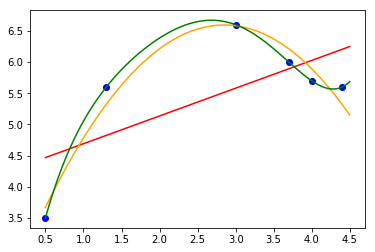

In [13]:
import pylab
import numpy as np

x = np.array([0.5, 1.3, 3.0, 3.7, 4.0, 4.4])
y = np.array([3.5, 5.6, 6.6, 6.0, 5.7, 5.6])

pylab.plot(x, y, 'bo')

## to design matrix (adding intercept term)
X = np.insert(x.reshape(x.size, 1), 0, 1, axis=1)

theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
lx = np.linspace(0.5, 4.5, 100)
ly = theta[0] + theta[1] * lx
pylab.plot(lx, ly, 'r')

## to design matrix (adding x^2 term)
X = np.concatenate((np.ones(x.size).reshape(x.size, 1), x.reshape(x.size, 1), x.reshape(x.size, 1)**2), axis=1)
theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
ly = theta[0] + theta[1] * lx + theta[2] * lx**2
pylab.plot(lx, ly, 'orange')

## to design matrix (adding up to x^5 term)
X = np.concatenate(
    (np.ones(x.size).reshape(x.size, 1),
     x.reshape(x.size, 1),
     x.reshape(x.size, 1)**2,
     x.reshape(x.size, 1)**3,
     x.reshape(x.size, 1)**4,
     x.reshape(x.size, 1)**5), axis=1)
theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
ly = theta[0] + theta[1] * lx + theta[2] * lx**2 + theta[3] * lx**3 + theta[4] * lx**4 + theta[5] * lx**5
pylab.plot(lx, ly, 'g')

The red line on the above figure shows the result of fitting a $y = \theta_{0} + \theta_{1}x$ to a dataset. We see that the data doesn't really lie on straight line, and so the fit is not very good. Instead, if we artificially add an extra feature $x^2$, and fit $y = \theta_{0} + \theta_{1}x + \theta_{2}x^2$,then we obtain a slightly better fit to the data (orange line). Naively, it might seem that the more features we add, the better. However, there is also a danger in adding too many features: the green line is the result of fitting a 5-th order polynomial. We see that even though the fitted curve passes through the data perfectly, we would not expect this to be a very good predictor. Without formally defining what these terms mean, we'll say the red line shows an instance of **underfitting** — in which the data clearly shows structure not captured by the model — and the figure on the right is an example of **overfitting**.

The locally weighted linear regression algorithm does the following: fit $\theta$ to minimize $\sum_{i} \omega^{(i)} \big(y^{(i)} - \theta^T x^{(i)} \big)^2$, where $\omega^{(i)}$'s are non-negative valued **weights**. A fairly standard choice for weights is

$$w^{(i)} = exp(- \frac{(x^{(i)} - x)^2}{2 \tau^2})$$

Note that the weights depend on the particular point $x$ at which we're trying to evaluate $x$. $\theta$ is chosen giving a much higher "weight" to the (errors on) training examples close to the query point $x$. The parameter
$\tau$ controls how quickly the weight of a training example falls off with distance of its $x^{(i)}$ from the query point $x$; $\tau$ is called the **bandwidth** parameter.

Locally weighted linear regression is an example of a **non-parametric** algorithm. The (unweighted) linear regression algorithm is known as a parametric learning algorithm, because it has a fixed, finite number of parameters (the $\theta_{i}$'s), which are fit to the data. Once we've fit the $\theta_{i}$'s and stored them away, we no longer need to
keep the training data around to make future predictions. In contrast, to make predictions using locally weighted linear regression, we need to keep the entire training set around. The term "non-parametric" (roughly) refers to the fact that the amount of stuff we need to keep in order to represent the hypothesis h grows linearly with the size of the training set.